<a href="https://colab.research.google.com/github/venkatesh-manikumar/Datascience-Assignments/blob/main/Test_05_15_cellphones_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing


In [261]:
data = pd.read_csv('/content/drive/MyDrive/DataScience/Test_05_15/Cellphone.csv')
data.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
705,1519,0,2.9,0,2,0,30,0.7,112,7,...,1122,1702,2440,9,5,10,1,1,1,2
44,1195,1,2.8,0,1,1,20,0.8,110,2,...,1580,1652,504,9,3,12,1,1,0,0
49,596,0,2.1,1,9,0,64,0.8,111,8,...,885,1854,3238,16,13,10,0,0,0,3
1419,820,0,0.5,1,2,0,58,0.3,160,4,...,468,694,1284,17,7,17,0,0,1,0
64,702,0,2.6,1,2,1,9,0.7,141,3,...,504,1570,2955,10,4,19,1,0,0,2


In [262]:
data.shape

(2000, 21)

### All the features are numeric type



In [263]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

### 20 features (Numeric) + 1 Target variable (price_range)

In [264]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns

print('Total Features - COUNT' , data.columns.size )
print('Numerical_cols - COUNT' , numerical_cols.size )
print('Categorical_cols - COUNT' , categorical_cols.size )

Total Features - COUNT 21
Numerical_cols - COUNT 21
Categorical_cols - COUNT 0


In [294]:
data[numerical_cols].head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Analysing target variable - has 4 classification 
0(low cost)
1(medium cost)
2(high cost) 
3(very high cost)

In [295]:
data.price_range.unique()

array([1, 2, 3, 0])

In [296]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

### Null check

In [297]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Checking Co-relation between Input features and target variable

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


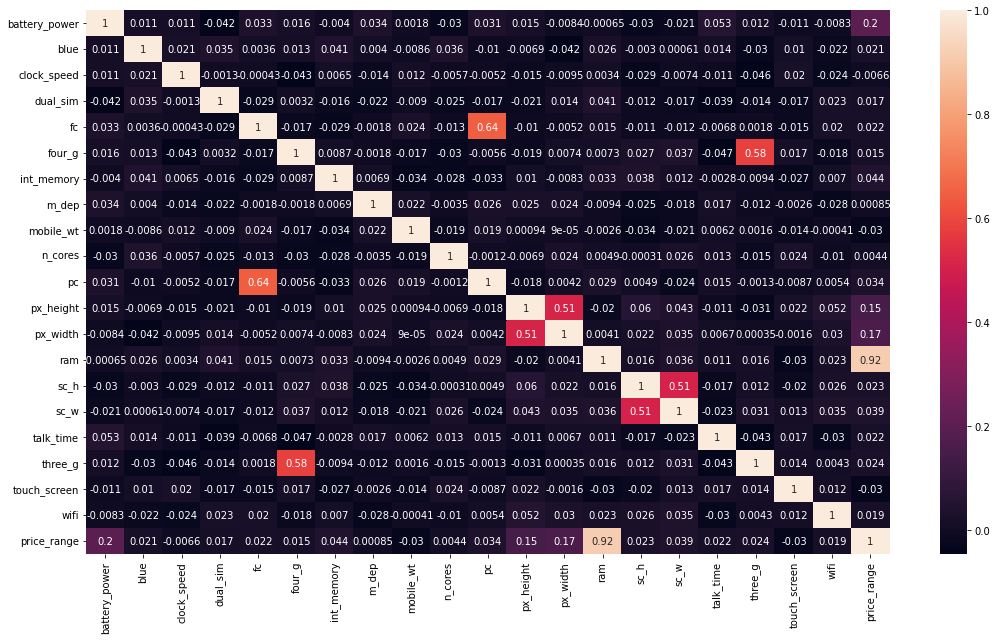

In [298]:
correlation = data.corr()
print(correlation["price_range"].sort_values(ascending=False))

plt.figure(figsize = (18,10))
sns.heatmap(data.corr(), annot=True)

### ram - having high corelation towards the output variable

In [299]:
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, subplot_titles=(["Histogram of RAM","Box Plot for RAM", "Violin Plot for RAM"]))


fig.append_trace(go.Histogram(x = data['ram']), row=1, col=1)
fig.append_trace(go.Box(x=data['ram'],), row=2, col=1)
fig.append_trace(go.Violin(x= data['ram']), row=3, col=1)


fig.update_layout(height=1000, width=800, title_text="Distribution Plots for RAM", showlegend=False, title_x = 0.5)
fig.show()


In [300]:
feature_cols = data.columns[0:20]

x = data [feature_cols]
y = data['price_range']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [289]:
xtest.shape

(400, 20)

In [273]:
ytest.shape

(400,)

In [301]:
from sklearn import metrics

def fit_predict(x_train, x_test, y_train, y_test, scaler, n_neighbours, metric = 'manhattan', weights = 'uniform'):
    train_scaled = scaler.fit_transform(x_train)
    test_scaled = scaler.transform(x_test)        
    knn = KNeighborsClassifier(n_neighbors=n_neighbours, metric=metric, weights=weights, n_jobs = 4)
    knn.fit(train_scaled, y_train)
    y_pred = knn.predict(test_scaled)
    print(metrics.accuracy_score(y_test, y_pred))

In [302]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

for k in range(1,11):
    print('Accuracy score on kNN using n_neighbours = {0}:'.format(2**k), end = ' ')
    fit_predict(xtrain, xtest, ytrain, ytest, StandardScaler(), 2**k)

Accuracy score on kNN using n_neighbours = 2: 0.4325
Accuracy score on kNN using n_neighbours = 4: 0.54
Accuracy score on kNN using n_neighbours = 8: 0.5575
Accuracy score on kNN using n_neighbours = 16: 0.57
Accuracy score on kNN using n_neighbours = 32: 0.625
Accuracy score on kNN using n_neighbours = 64: 0.705
Accuracy score on kNN using n_neighbours = 128: 0.725
Accuracy score on kNN using n_neighbours = 256: 0.75
Accuracy score on kNN using n_neighbours = 512: 0.75
Accuracy score on kNN using n_neighbours = 1024: 0.6975


### Metric tuning


In [304]:
k=2
for metric in ['euclidean', 'cosine', 'manhattan', 'chebyshev']:
    print('Accuracy score on kNN using {} metric and {} neighbours:'.format(metric,k), end = ' ')
    fit_predict(xtrain, xtest, ytrain, ytest, StandardScaler(), 2, metric)

Accuracy score on kNN using euclidean metric and 2 neighbours: 0.43
Accuracy score on kNN using cosine metric and 2 neighbours: 0.425
Accuracy score on kNN using manhattan metric and 2 neighbours: 0.4325
Accuracy score on kNN using chebyshev metric and 2 neighbours: 0.335


### Weighted kNN

In [307]:
for weights in ['uniform', 'distance']:
    print('Accuracy score on kNN using weights = {0}:'.format(weights), end = ' ')
    fit_predict(xtrain, xtest, ytrain, ytest, StandardScaler(), 2, 'manhattan', weights = weights)

Accuracy score on kNN using weights = uniform: 0.4325
Accuracy score on kNN using weights = distance: 0.435
